# Mini Project 5-4 Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [2]:
# Import relevant packages
import pandas as pd
import numpy as np

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [4]:
# Import data
df = pd.read_csv("c4_epa_air_quality.csv")

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [5]:
# Code Here
df.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [6]:
# Code Here
df['date_local'] = pd.to_datetime(df['date_local'])

In [7]:
# Code Here
start_date = df['date_local'].min()
end_date = df['date_local'].max()


**Question:** What time range does this data cover?

In [8]:
# Code Here
print(f"Data covers the period from {start_date} to {end_date}")

Data covers the period from 2018-01-01 00:00:00 to 2018-01-01 00:00:00


A:2018-01-01 00:00:00 to 2018-01-01 00:00:00

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [9]:
# Code Here
min_aqi = df['aqi'].min()
max_aqi = df['aqi'].max()
print(f"Minimum AQI: {min_aqi}")
print(f"Maximum AQI: {max_aqi}")

Minimum AQI: 0
Maximum AQI: 50


**Question:** Are all states equally represented in the dataset?

In [10]:
# Code Here
state_counts = df['state_name'].value_counts()

In [12]:
# Code Here
import pandas as pd
import matplotlib.pyplot as plt

state_counts_df = state_counts.to_frame().reset_index()
state_counts_df.columns = ['State', 'Count']
print(state_counts_df)

                   State  Count
0             California     66
1                Arizona     14
2                   Ohio     12
3                Florida     12
4                  Texas     10
5               New York     10
6           Pennsylvania     10
7               Michigan      9
8               Colorado      9
9              Minnesota      7
10            New Jersey      6
11               Indiana      5
12        North Carolina      4
13         Massachusetts      4
14              Maryland      4
15              Oklahoma      4
16              Virginia      4
17                Nevada      4
18           Connecticut      4
19              Kentucky      3
20              Missouri      3
21               Wyoming      3
22                  Iowa      3
23                Hawaii      3
24                  Utah      3
25               Vermont      3
26              Illinois      3
27         New Hampshire      2
28  District Of Columbia      2
29            New Mexico      2
30      

A:

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [14]:
# Summarize the mean AQI for RRE states.
import pandas as pd
import matplotlib.pyplot as plt

# Create a list of RRE states.
rre_states = ["California", "Florida", "Michigan", "Ohio", "Pennsylvania", "Texas"]


# Subset `aqi` to only consider these states.
rre_data = df[df['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.
 #alias as aqi_rre
aqi_rre = rre_data.groupby('state_name')['aqi'].mean().reset_index()

print(aqi_rre)

     state_name        aqi
0    California  12.121212
1       Florida   5.500000
2      Michigan   8.111111
3          Ohio   3.333333
4  Pennsylvania   2.900000
5         Texas   2.700000


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [17]:
# Import seaborn as sns.
import seaborn as sns
import matplotlib.pyplot as plt

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

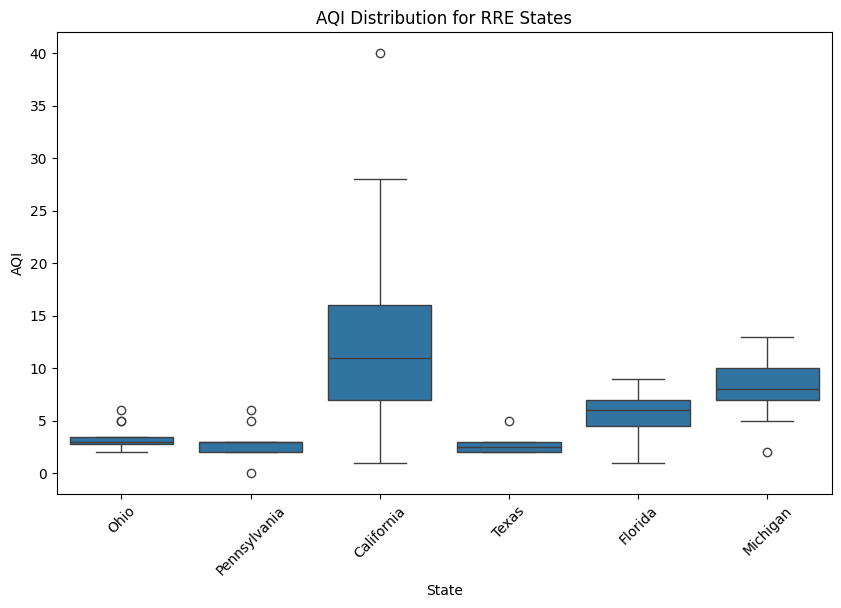

In [18]:
# Code Here
plt.figure(figsize=(10, 6))
sns.boxplot(x='state_name', y='aqi', data=rre_data)

plt.xlabel("State")
plt.ylabel("AQI")
plt.title("AQI Distribution for RRE States")

plt.xticks(rotation=45)
plt.show()

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

A:The median AQI for California is noticeably higher than the other states.

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for CA.

In [19]:
# Find the mean aqi for CA state.
ca_aqi = rre_data[rre_data['state_name'] == "California"]['aqi']
ca_mean = ca_aqi.mean()
print(f"Mean AQI for California: {ca_mean:.2f}")

Mean AQI for California: 12.12


### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [20]:
# Input your confidence level here:
confidence_level = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [23]:
# Calculate your margin of error.
import scipy.stats as stats
import numpy as np

# Begin by identifying the z associated with your chosen confidence level.
ca_std = ca_aqi.std(ddof=1)
n = len(ca_aqi)


z_value = 1.96

# Next, calculate your standard error.
standard_error = ca_std / np.sqrt(n)

# Lastly, use the preceding result to calculate your margin of error.
margin_of_error = z_value * standard_error
print(f"Margin of Error: {margin_of_error:.2f}")


Margin of Error: 1.76


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [24]:
# Calculate your confidence interval (upper and lower limits).
import scipy.stats as stats
import numpy as np
ca_std = ca_aqi.std(ddof=1)
n = len(ca_aqi)
standard_error = ca_std / np.sqrt(n)
z_value = 1.96
margin_of_error = z_value * standard_error
ci_lower = ca_mean - margin_of_error
ci_upper = ca_mean + margin_of_error
print(f"Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

Confidence Interval: (10.36, 13.88)


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [26]:
# Import stats from scipy.
import scipy as sp

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [27]:
# Code Here
ci_lower, ci_upper = stats.norm.interval(confidence_level, loc=ca_mean, scale=standard_error)
print(f"95% Confidence Interval using scipy: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval using scipy: (10.36, 13.88)


# Considerations

**What are some key takeaways that you learned from this project?**

A:The 95% confidence interval for California's AQI tells us that the true population mean likely falls within this range.


**What findings would you share with others?**

A: California is the most likely state to be affected by the policy due to its high AQI.

**What would you convey to external readers?**

A:California consistently experiences higher AQI levels, making it a prime candidate for intervention.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 